In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import collections
import random
import matplotlib.pyplot as plt
import sklearn.datasets
from TreeBasedMethods import *
from optimizer_functions import logistic_regression_sgd
import seaborn as sns
from activation_functions import *
from optimizer_functions import *
from cost_functions import *
from Layer import Layer
from NeuralNetwork import NeuralNetwork

In [60]:
df = pd.read_csv('diabetes.csv')

In [61]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [63]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

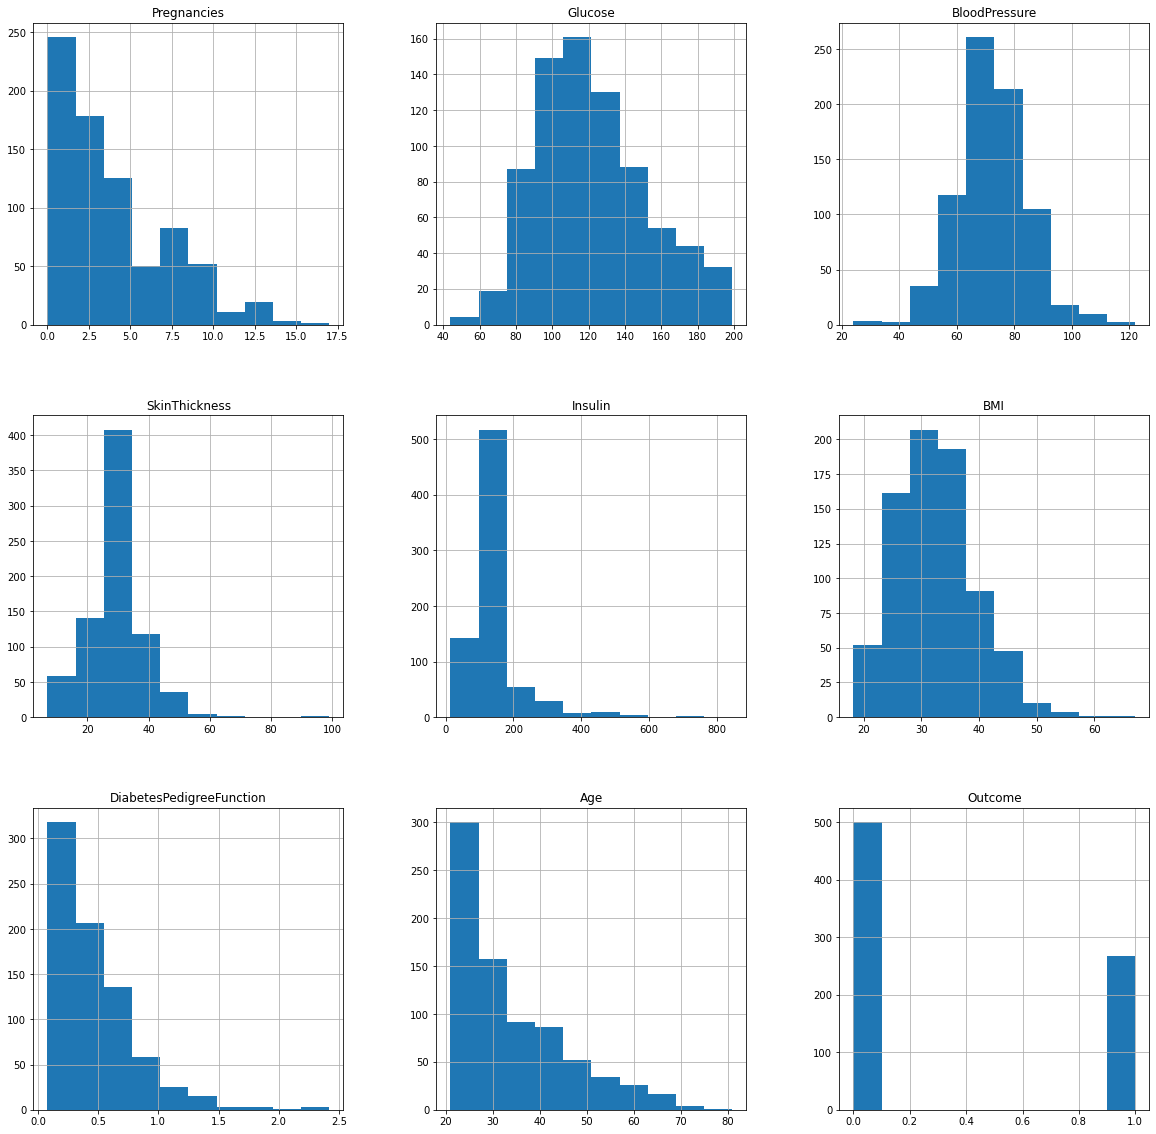

In [64]:
df.hist(figsize = (20,20))

In [65]:
# add scatterplots? correlation heatmap?

In [66]:
# splitting in train and test 

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [67]:
# scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# comparison performance our implementation and sklearn

y_train_comp = y_train.values*2-1
y_test_comp = y_test.values*2-1

clf = DecisionTreeClass(max_depth=200)
clf.fit(X_train, y_train_comp)

y_pred = clf.predict(X_test)
acc = accuracy(y_test_comp, y_pred)

print("Tree accuracy:", acc)

model = RandomForest()
model.fit(X_train, y_train_comp)
preds = model.predict(X_test)

acc = accuracy(y_test_comp, preds)

print("Random forest accuracy:", acc)

model = AdaBoost()
model.fit(X_train, y_train_comp)
preds = model.predict(X_test)

acc = accuracy(y_test_comp, preds)

print("Adaboost accuracy:", acc)

Tree accuracy: 0.6818181818181818
Random forest accuracy: 0.7922077922077922
Adaboost accuracy: 0.5714285714285714


In [69]:
# decision tree
# cost-complexity pruning, train and test error

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

In [70]:
alphas = dec_tree.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']
len_alphas = len(alphas)

train_err_dec_tree = np.zeros(len_alphas)
test_err_dec_tree = np.zeros(len_alphas)

for i in range(len_alphas):
    a = alphas[i]
    dec_tree.ccp_alpha = a
    dec_tree.fit(X_train,y_train)
    train_err_dec_tree[i] = dec_tree.score(X_train,y_train)
    test_err_dec_tree[i] = dec_tree.score(X_test,y_test)

best_alpha = alphas[np.argmax(test_err_dec_tree)]

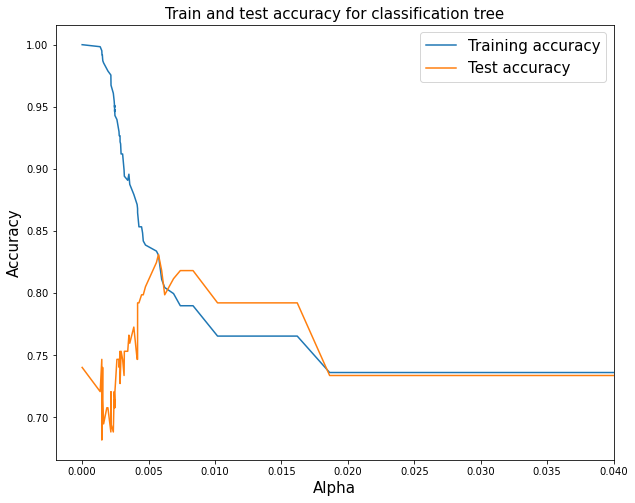

<Figure size 432x288 with 0 Axes>

In [104]:
fig = plt.figure(figsize = (10,8))
plt.plot(alphas,train_err_dec_tree, label = 'Training accuracy')
plt.plot(alphas,test_err_dec_tree, label = 'Test accuracy')
plt.legend(fontsize=15)
plt.xlim((-0.002,0.04))
plt.xlabel("Alpha", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Train and test accuracy for classification tree", fontsize=15)
plt.show()
#plt.savefig("Train and test accuracy for classification tree.png")

In [92]:
dec_tree.ccp_alpha = best_alpha
dec_tree.fit(X_train,y_train)
dec_tree.score(X_test,y_test)

0.8246753246753247

In [94]:
unpruned_tree_acc = DecisionTreeClassifier().fit(X_train,y_train).score(X_test,y_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

ntrees_v = range(1,801,5)
rf = RandomForestClassifier()
ab = AdaBoostClassifier()

test_err_rf = []
test_err_ab = []

for n in ntrees_v:

    rf.n_estimators = int(n)
    rf.fit(X_train,y_train)
    test_err_rf.append(rf.score(X_test,y_test))

    ab.n_estimators = int(n)
    ab.fit(X_train,y_train)
    test_err_ab.append(ab.score(X_test,y_test))


# compare classification error with increasing number of trees

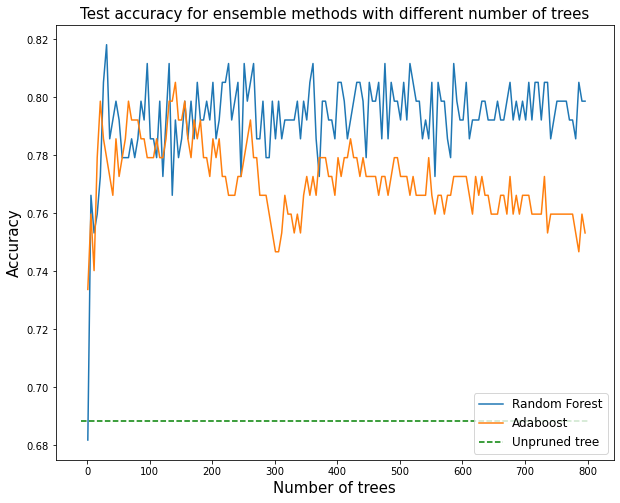

<Figure size 432x288 with 0 Axes>

In [101]:
fig = plt.figure(figsize = (10,8))
plt.plot(ntrees_v,test_err_rf, label = 'Random Forest')
plt.plot(ntrees_v,test_err_ab, label = 'Adaboost')
plt.hlines(unpruned_tree_acc,-10,801, colors = 'green', label = 'Unpruned tree',linestyles='dashed')
plt.legend(fontsize=12)
plt.xlabel("Number of trees",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.title("Test accuracy for ensemble methods with different number of trees",fontsize=15)
plt.show()
#plt.savefig("Test accuracy for ensemble methods with different number of trees.png")

In [87]:
n_vars = range(1,9)

rf = RandomForestClassifier(n_estimators=500)

test_err_rf = []

for n in n_vars:

    rf.max_features = n
    rf.fit(X_train,y_train)
    test_err_rf.append(rf.score(X_test,y_test))

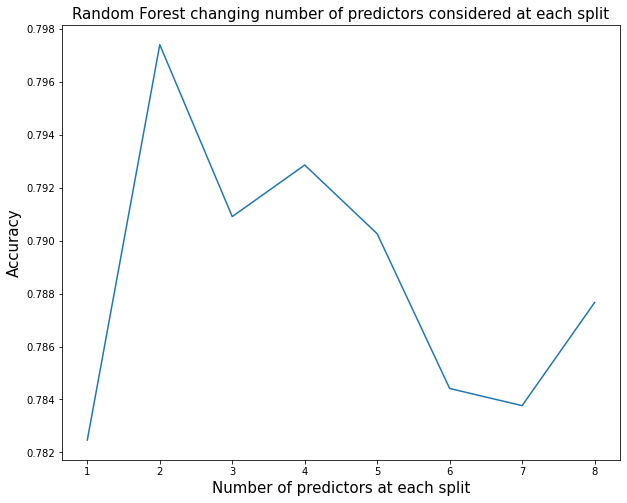

<Figure size 432x288 with 0 Axes>

In [89]:
fig = plt.figure(figsize = (10,8))
plt.plot(n_vars,test_err_rf)
plt.xlabel("Number of predictors at each split", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Random Forest changing number of predictors considered at each split", fontsize=15)
plt.show()
#plt.savefig("Random Forest changing number of predictors considered at each split.png")

<BarContainer object of 8 artists>

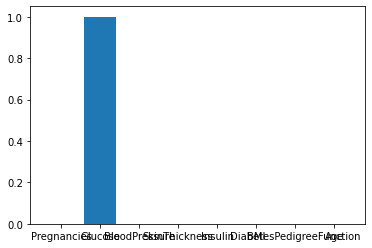

In [21]:
# variable importance with single tree

# tree che scelgo + variable importance
dec_tree.ccp_alpha = best_alpha
dec_tree.fit(X_train,y_train)
dec_tree_importances = dec_tree.feature_importances_
plt.bar(X.columns,dec_tree_importances)

<BarContainer object of 8 artists>

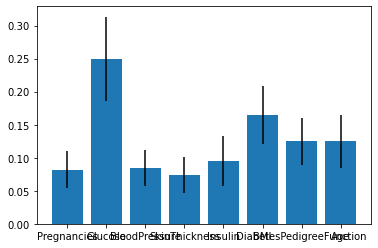

In [22]:
# variable importance with random forest

rf = RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)
rf_importances = rf.feature_importances_
rf_std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
plt.bar(X.columns,rf_importances, yerr=rf_std)

In [ ]:
# selecting 5 variables

In [ ]:
# selecting 2 variables

* variable selection: provare a vedere se con meno variabili la performance peggiora tabella
* Roc curves? Other metrics.....
* aggiungere logistic regression e neural network

In [45]:
# logistic regression

# grid search best parameters logistic regression

# tuning learning rate and regularization parameter

y_train_log = y_train.values
y_test_log = y_test.values

eta_list = [1e-4, 0.001, 0.01, 0.02, 0.05]
reg_list = [0, 0.01, 0.1, 1, 10]
accuracy_mat = np.zeros((len(reg_list),len(eta_list)))

for j in range(len(eta_list)):
    for i in range(len(reg_list)):
       
        reg = reg_list[i]
        eta = eta_list[j]

        betas = logistic_regression_sgd(X_train, y_train_log, eta, reg, 200, 50)
        ypred = ((X_test @ betas)>=0.5)
        accuracy_mat[i][j] = sum(y_test_log == ypred)/np.shape(y_test)[0]

Text(0.5, 1.0, 'Accuracy grid search for learning rate and regularization parameter for logistic regression')

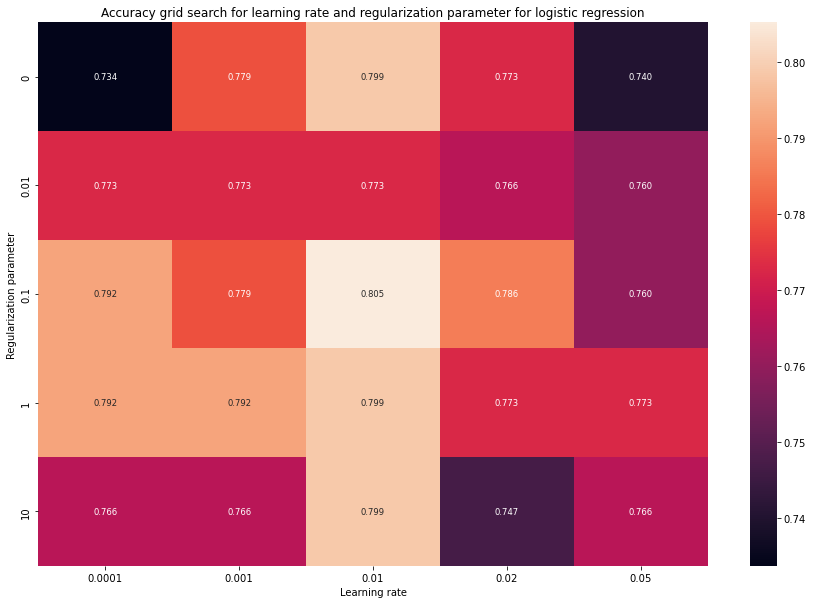

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(accuracy_mat, xticklabels=eta_list, yticklabels=reg_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.ylabel("Regularization parameter")
plt.xlabel("Learning rate")
plt.title("Accuracy grid search for learning rate and regularization parameter for logistic regression")
#plt.savefig("logreg_accuracy_lr_nn_grid_search.png")

In [57]:
# tuning learning rate and regularization parameter

y_train_nn = y_train.values.reshape(len(y_train),1)
y_test_nn = y_test.values.reshape(len(y_test),1)

eta_list = [1e-4, 0.001, 0.01, 0.02, 0.05]
reg_list = [0, 0.01, 0.1, 1, 10]
accuracy_mat_nn = np.zeros((len(reg_list),len(eta_list)))

for j in range(len(eta_list)):
    for i in range(len(reg_list)):
       
        reg = reg_list[i]
        eta = eta_list[j]

        nn = NeuralNetwork(8, class_cost_grad,random_state=1)
        layer1 = Layer(30, sigmoid, sigmoid_grad)
        layer2 = Layer(1, sigmoid, sigmoid_grad)
        nn.add_layer(layer1)
        nn.add_layer(layer2)
        nn.train(X_train,y_train_nn,eta=eta,regularization=reg, epochs=200)

        pred = nn.feed_forward_out(X_test)
        pred = pred.round()
        accuracy_mat_nn[i][j] = np.sum(pred == y_test_nn)/y_test.shape[0]

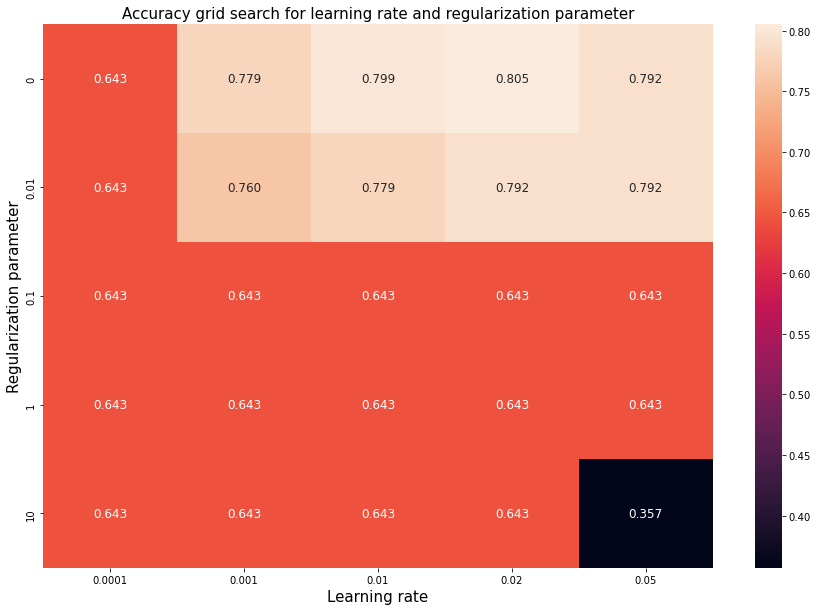

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(accuracy_mat_nn, xticklabels=eta_list, yticklabels=reg_list, annot=True, annot_kws={"size": 12}, fmt=".3f")
plt.ylabel("Regularization parameter", fontsize=15)
plt.xlabel("Learning rate", fontsize=15)
plt.title("Accuracy grid search for learning rate and regularization parameter", fontsize=15)
plt.savefig("accuracy_grid_search.png")